In [56]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
filename='matches.csv'



In [2]:
data = pd.read_csv(filename)
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries_df = pd.read_csv('deliveries.csv')
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


## Total number of matches played in each season

Number of matches played so far in IPL :  756
Number of seasons in IPL :  12
Number of Teams participated in IPL :  15


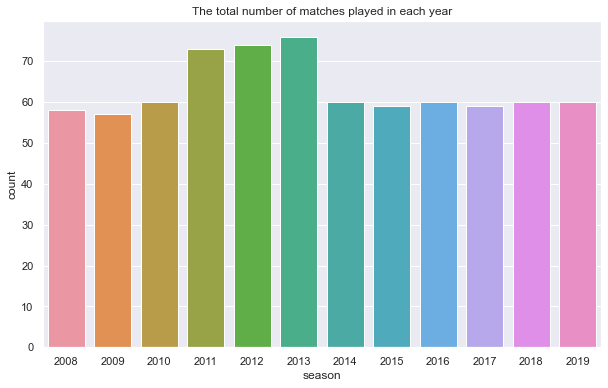

In [6]:
sns.set(style="darkgrid")
print("Number of matches played so far in IPL : ", data.shape[0])
print("Number of seasons in IPL : ", len(data.season.unique()))
print("Number of Teams participated in IPL : ", len(data.team1.unique()))
#print("Number of Teams participated in IPL : ", len(data.team2.unique())) 
plt.figure(figsize=(10,6))
sns.countplot(x='season', data=data)
plt.title('The total number of matches played in each year')
plt.show()



 ## numbers of matches in each venue

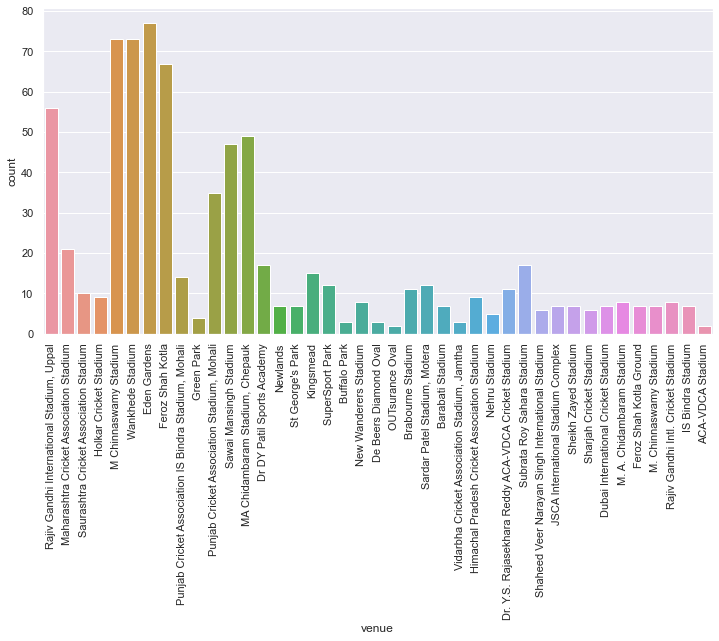

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
df = pd.melt(data, id_vars=['id','season'], value_vars=['team1', 'team2'])
df.head()

,id,season,variable,value
0,1,2017,team1,Sunrisers Hyderabad
1,2,2017,team1,Mumbai Indians
2,3,2017,team1,Gujarat Lions
3,4,2017,team1,Rising Pune Supergiant
4,5,2017,team1,Royal Challengers Bangalore


## most played teams

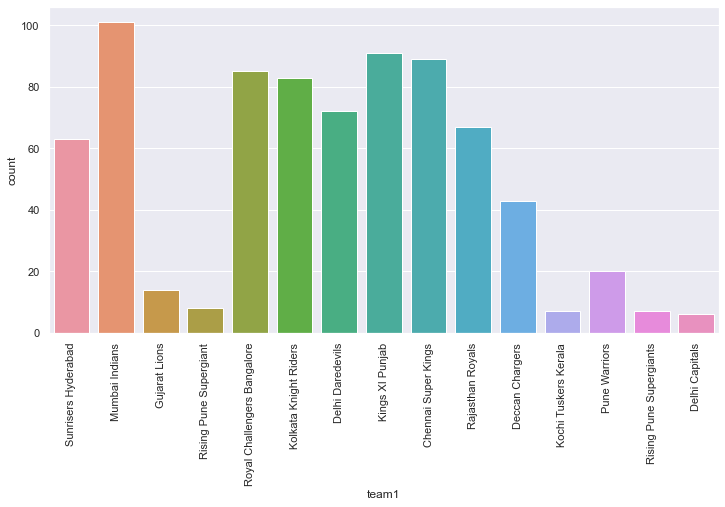

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='team1', data=data)
plt.xticks(rotation='vertical')
plt.show()

## Matches played at Chinnaswamy Stadium (you can change the stadium)

In [71]:
eden_df = data[data['venue'] == 'M Chinnaswamy Stadium']
eden_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,WeekDay
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN,4
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN,6
29,30,2017,Bangalore,2017-04-27,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin,NaN,3
41,42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin,NaN,4


In [52]:
eden_df_1 = pd.melt(eden_df, id_vars=['id','season'], value_vars=['team1', 'team2'])
eden_df_1.head()

,id,season,variable,value
0,5,2017,team1,Royal Challengers Bangalore
1,12,2017,team1,Royal Challengers Bangalore
2,17,2017,team1,Rising Pune Supergiant
3,30,2017,team1,Royal Challengers Bangalore
4,42,2017,team1,Kings XI Punjab


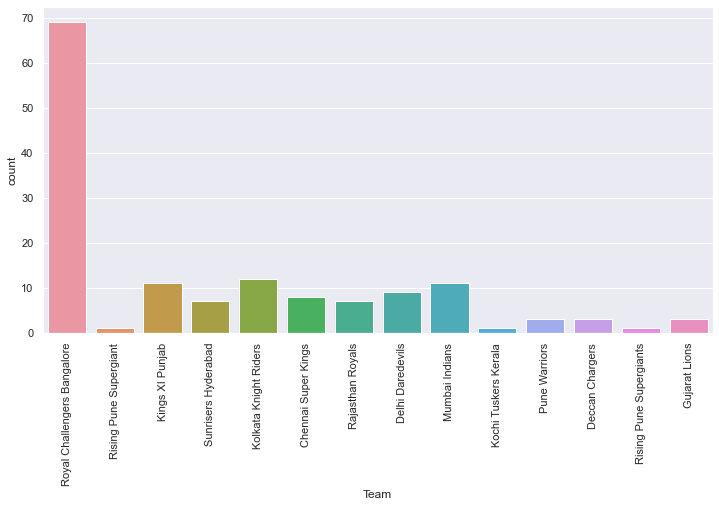

In [53]:
eden_df_1.columns = ['id', 'season', 'varaible', 'Team']
plt.figure(figsize=(12,6))
sns.countplot(x='Team', data=eden_df_1)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [14]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [15]:
deliveries_df.drop(['player_dismissed', 'dismissal_kind', 'fielder'],axis=1,inplace=True)


In [16]:
#converting the data format into weekdays
data['date'] = pd.to_datetime(data['date'])
data["WeekDay"] = data["date"].dt.weekday
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,WeekDay
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,4
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,5
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5


##   The win percentage of a team batting second at Chinnaswamy Stadium during 2008 to 2019 (you can change the stadium)

In [54]:
df = data[(data['toss_decision'] == 'field') &  (data['venue'] == 'M Chinnaswamy Stadium') &
             (data['season'] >= 2008) & (data['season'] <= 2019)
             ]
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,WeekDay
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN,4
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN,6
29,30,2017,Bangalore,2017-04-27,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin,NaN,3
41,42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin,NaN,4
44,45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN,6


## Team that had won by maximum runs

In [18]:
data.iloc[data['win_by_runs'].idxmax()]

id                                  44
season                            2017
city                             Delhi
date               2017-05-06 00:00:00
team1                   Mumbai Indians
team2                 Delhi Daredevils
toss_winner           Delhi Daredevils
toss_decision                    field
result                          normal
dl_applied                           0
winner                  Mumbai Indians
win_by_runs                        146
win_by_wickets                       0
player_of_match            LMP Simmons
venue                 Feroz Shah Kotla
umpire1                    Nitin Menon
umpire2                      CK Nandan
umpire3                            NaN
WeekDay                              5
Name: 43, dtype: object

## Team that had won by minimum runs

In [19]:
data.iloc[data['win_by_runs'].idxmin()]

id                                                       2
season                                                2017
city                                                  Pune
date                                   2017-04-06 00:00:00
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

## how did winning toss helped in winning matches

In [20]:
ss=data['toss_winner']==data['winner']
ss.groupby(ss).size()

False    363
True     393
dtype: int64

C:\Users\Kushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


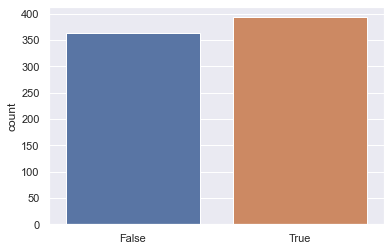

In [21]:
sns.countplot(data['toss_winner']==data['winner'])
sns.countplot(ss);

## Team that won by maximum wickets

In [22]:
data.iloc[data['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

## Team that won by minimum wickets

In [23]:
data.iloc[data['win_by_wickets'].idxmin()]['winner']

'Sunrisers Hyderabad'

## Top players of the match 

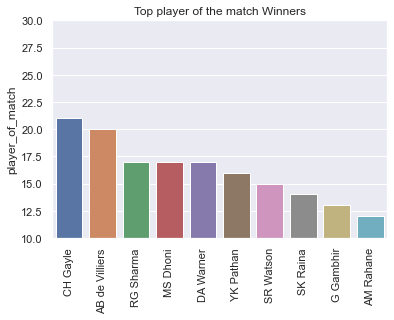

In [24]:
top_players = data.player_of_match.value_counts()[:10]

fig, ax = plt.subplots()
ax.set_ylim([10,30])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v');

plt.show()

## Best batting team 

In [25]:
data.winner[data.win_by_wickets!=0].mode()

0    Kolkata Knight Riders
dtype: object

## Best defending team

In [26]:
data.winner[data.win_by_runs!=0].mode()

0    Mumbai Indians
dtype: object

## cities that are effected by weather 

C:\Users\Kushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


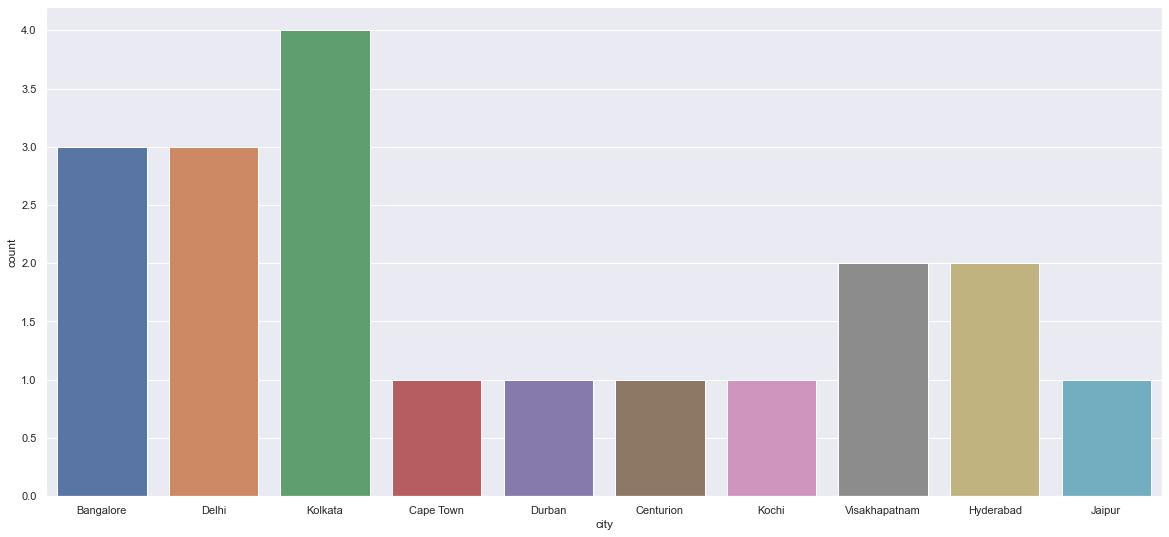

In [27]:
plt.figure(figsize=(20,9))
sns.countplot(data.city[data.dl_applied==1])
plt.show()

## Toss decision

Toss Decisions in %
 field    80.242634
bat      50.779896
Name: toss_decision, dtype: float64


C:\Users\Kushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='toss_decision', ylabel='count'>

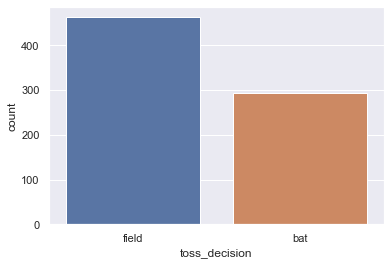

In [28]:
print('Toss Decisions in %\n',((data['toss_decision']).value_counts())/577*100)
sns.countplot(data['toss_decision'])

## Toss decision across seasons

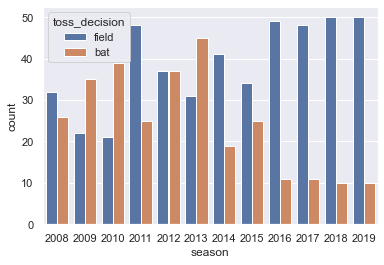

In [29]:
sns.countplot(x='season',hue='toss_decision',data=data)
plt.show()

## Best batsman

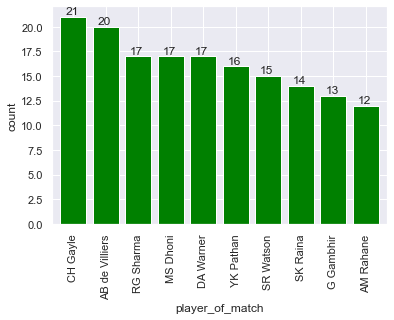

In [40]:
ax = data['player_of_match'].value_counts().head(10).plot.bar(width=.8, color='green') 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

## winners by year 

In [31]:
for i in range(2008,2017):
    df=((data[data['season']==i]).iloc[-1]) 
    print(df[[1,10]])   

season                2008
winner    Rajasthan Royals
Name: 116, dtype: object
season               2009
winner    Deccan Chargers
Name: 173, dtype: object
season                   2010
winner    Chennai Super Kings
Name: 233, dtype: object
season                   2011
winner    Chennai Super Kings
Name: 306, dtype: object
season                     2012
winner    Kolkata Knight Riders
Name: 380, dtype: object
season              2013
winner    Mumbai Indians
Name: 456, dtype: object
season                     2014
winner    Kolkata Knight Riders
Name: 516, dtype: object
season              2015
winner    Mumbai Indians
Name: 575, dtype: object
season                   2016
winner    Sunrisers Hyderabad
Name: 635, dtype: object


## maximum no.of  sixes 

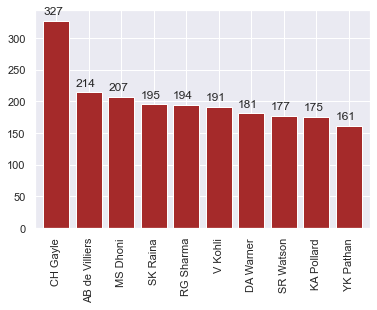

In [41]:
ax=deliveries_df[deliveries_df['batsman_runs']==6].batsman.value_counts()[:10].plot.bar(width=0.8,color='brown')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+10))
plt.show()

## Team with maximum sixes

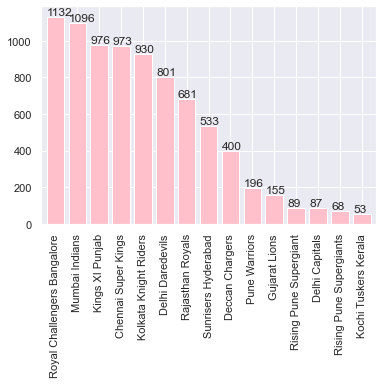

In [42]:
ax=deliveries_df[deliveries_df['batsman_runs']==6].batting_team.value_counts().plot.bar(width=0.8,color='pink')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+10))
plt.show()

## maximum no.of  fours

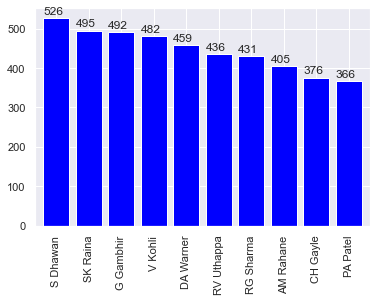

In [43]:
ax=deliveries_df[deliveries_df['batsman_runs']==4].batsman.value_counts()[:10].plot.bar(width=0.8,color='blue')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+10))
plt.show()

## Best IPL team in history 

In [35]:
#BEST IPL TEAM 
df = data.loc[data.groupby('season').date.idxmax()]
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,WeekDay
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN,6
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,6
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN,6
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN,5
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN,6


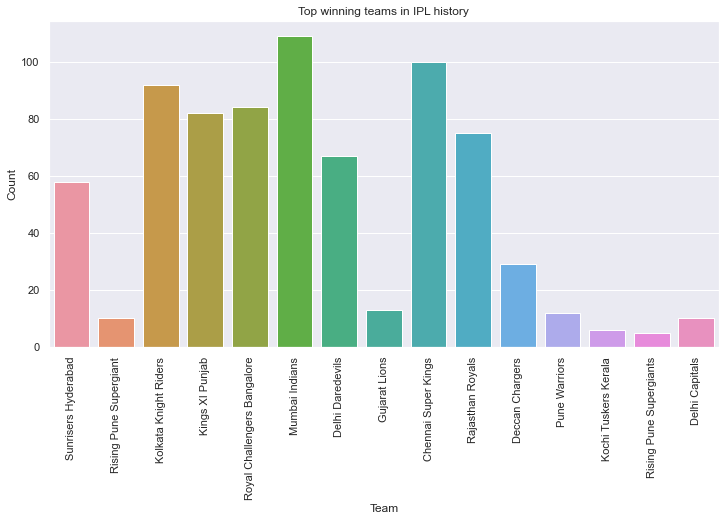

In [36]:
plt.figure(figsize=(12,6))

plt.title('Top winning teams in IPL history')
sns.countplot(x='winner', data=data)
plt.xlabel("Team")
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.show()